In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train_dir = 'mnist-jpg/train'  # replace with the path to your training folder
test_dir = 'mnist-jpg/test'    # replace with the path to your testing folder
input_shape = (128, 128, 3)  # Adjust this shape based on your image dimensions


In [5]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)



In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # resize images to input_shape
    batch_size=32,
    class_mode='sparse'  # use 'sparse' for integer labels
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse'
)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [9]:
# b. Defining the model’s architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))  # Adjust output layer for number of classes

model.summary()

C:\Users\Dhiraj Durande\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,610 (28.20 MB)

 Trainable params: 7,393,610 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# c. Training the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

C:\Users\Dhiraj Durande\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 534s 284ms/step - accuracy: 0.8815 - loss: 0.3869 - val_accuracy: 0.9791 - val_loss: 0.0647
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 547s 292ms/step - accuracy: 0.9676 - loss: 0.1075 - val_accuracy: 0.9828 - val_loss: 0.0560
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 567s 302ms/step - accuracy: 0.9771 - loss: 0.0730 - val_accuracy: 0.9836 - val_loss: 0.0509
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1709s 912ms/step - accuracy: 0.9813 - loss: 0.0595 - val_accuracy: 0.9854 - val_loss: 0.0530
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1612s 860ms/step - accuracy: 0.9850 - loss: 0.0461 - val_accuracy: 0.9830 - val_loss: 0.0612
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 762s 406ms/step - accuracy: 0.9867 - loss: 0.0409 - val_accuracy: 0.9826 - val_loss: 0.0605
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 766s 409ms/step - accuracy: 0.9883 - loss: 0.0342 - val_accuracy: 0.9826 - val_loss: 0.0651
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 817s 436ms/step - 

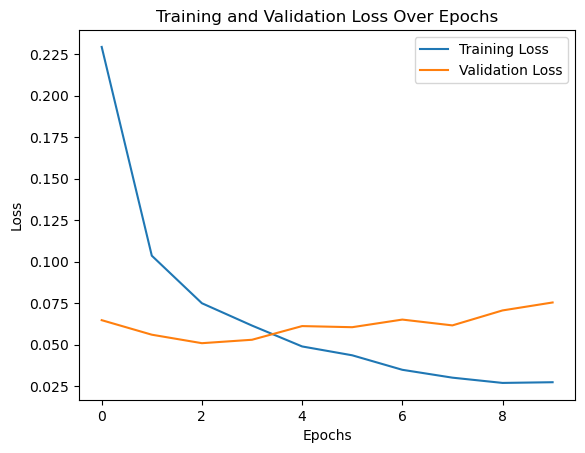

In [13]:
# Plot training and validation loss
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.show()

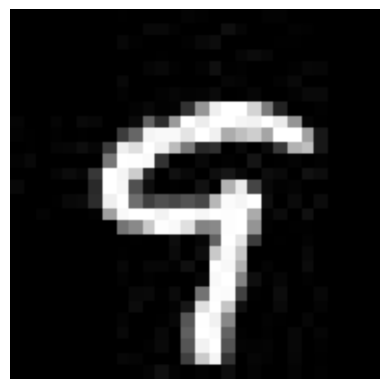

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Class: 9


In [41]:
# Display an example image and prediction
for images, labels in train_generator:
    image = images[4]
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Predict the class of the image
    image = np.expand_dims(image, axis=0)  # Expand dimensions for a single prediction
    predicted_value = model.predict(image)
    print("Predicted Class: {}".format(np.argmax(predicted_value)))
    break  # Break after displaying one image